In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("./full_data.csv")

In [3]:
df = df.drop(columns=["filename"])

# Down Sampling:

In [4]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]
value_counts = df['kelas'].value_counts()
total_count = df.shape[0]
class_counts = []
for i in value_counts:
    class_counts.append(i)
excludeColumn = value_counts.idxmin()
columnSaved = value_counts[value_counts.index!=excludeColumn].index
minorityClass = df[df.kelas == excludeColumn].index
selected_examples = []
for col in columnSaved:
  major = df[df.kelas == col].index
  num_examples = min(class_counts)
  
  # Loop through each class
  class_examples = np.random.choice(major, size=num_examples, replace=False)
    
    # Add the selected examples to the list
  selected_examples.extend(class_examples)
  print("Total of",col,":",len(class_examples))
undersampleIndices = np.concatenate([minorityClass,selected_examples])
df = df.loc[undersampleIndices]

Total of FNSZ : 230
Total of GNSZ : 230


In [5]:
df.kelas.value_counts()

CPSZ    230
FNSZ    230
GNSZ    230
Name: kelas, dtype: int64

# Tanpa downsampling:

In [4]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]

# Label Encoding: 

In [5]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['kelas']= label_encoder.fit_transform(df['kelas'])
le_name_mapping = dict(zip(label_encoder.classes_, 
                            label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

df['kelas'].unique()

{'CPSZ': 0, 'FNSZ': 1, 'GNSZ': 2}


array([1, 2, 0])

In [6]:
y = df['kelas']
x = df.drop(columns='kelas') #siapkan x dan y

# Over sampling:

In [7]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

# data splitting:

In [8]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.1, random_state = 0)

# KNN:

## Euclidean:

Accuracy: 0.7607142857142857
              precision    recall  f1-score   support

        CPSZ       0.76      0.89      0.82        95
        FNSZ       0.83      0.56      0.67        98
        GNSZ       0.72      0.84      0.77        87

    accuracy                           0.76       280
   macro avg       0.77      0.77      0.75       280
weighted avg       0.77      0.76      0.75       280



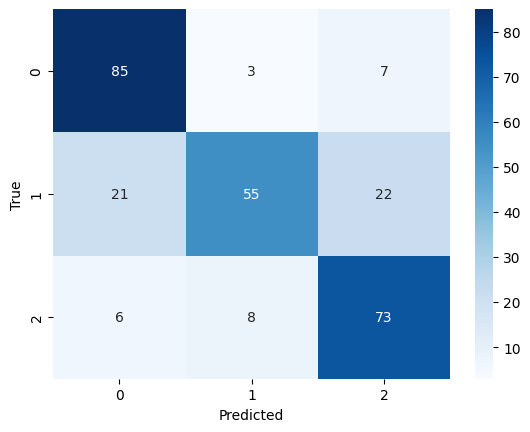

In [9]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3, 
                        metric='euclidean').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Cosine:

Accuracy: 0.5821428571428572
              precision    recall  f1-score   support

        CPSZ       0.56      0.69      0.62        95
        FNSZ       0.52      0.43      0.47        98
        GNSZ       0.67      0.63      0.65        87

    accuracy                           0.58       280
   macro avg       0.58      0.59      0.58       280
weighted avg       0.58      0.58      0.58       280



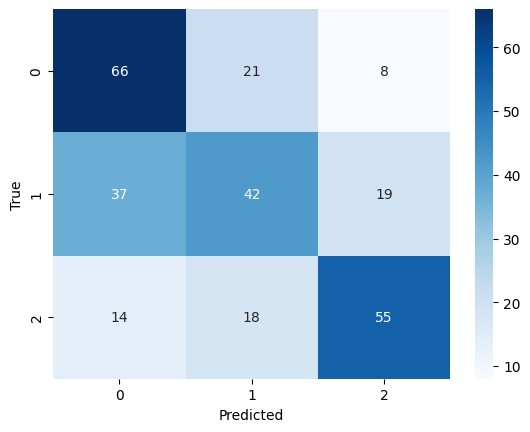

In [10]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, 
                        metric='cosine').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Cityblock:

Accuracy: 0.75
              precision    recall  f1-score   support

        CPSZ       0.75      0.87      0.81        95
        FNSZ       0.79      0.55      0.65        98
        GNSZ       0.72      0.84      0.78        87

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.74       280
weighted avg       0.76      0.75      0.74       280



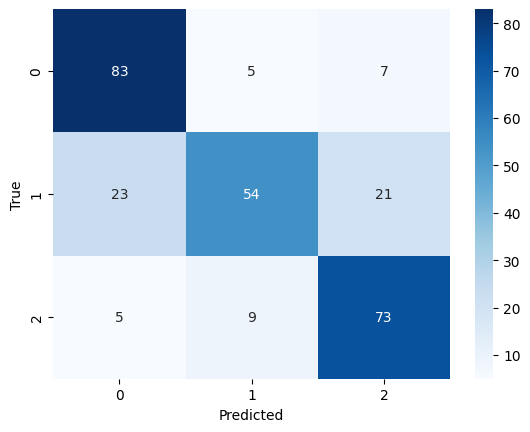

In [11]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, 
                        metric='cityblock').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Minkowski:

Accuracy: 0.7607142857142857
              precision    recall  f1-score   support

        CPSZ       0.76      0.89      0.82        95
        FNSZ       0.83      0.56      0.67        98
        GNSZ       0.72      0.84      0.77        87

    accuracy                           0.76       280
   macro avg       0.77      0.77      0.75       280
weighted avg       0.77      0.76      0.75       280



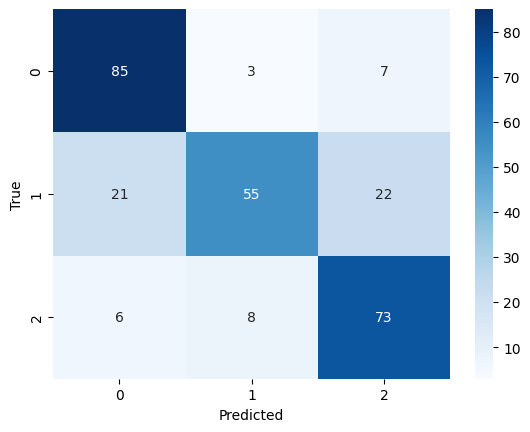

In [12]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, 
                        metric='minkowski').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Correlation:

Accuracy: 0.3392857142857143
              precision    recall  f1-score   support

        CPSZ       0.34      0.94      0.50        95
        FNSZ       0.40      0.02      0.04        98
        GNSZ       0.24      0.05      0.08        87

    accuracy                           0.34       280
   macro avg       0.33      0.33      0.21       280
weighted avg       0.33      0.34      0.21       280



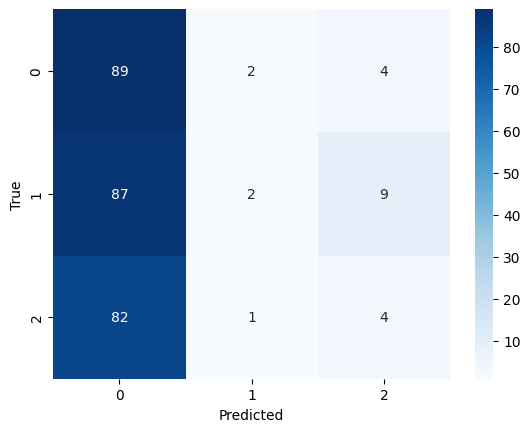

In [13]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import scipy
knn = KNeighborsClassifier(n_neighbors = 3, 
                       metric='correlation').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()